Autores

Rodrigo Makoto Takumi 176897

Carlos Augusto Jardim Chiarelli 165685

$$$$

# **22 - Projeto de controladores discretos (incompleto)**

$$$$

In [1]:
# bibliotecas
import numpy as np
import sympy as sp
import matplotlib.pyplot       as plt
import control                 as ctl
import control.matlab as mat
from   numpy                   import sqrt, cos, pi
from   scipy.signal            import residue
from   IPython.core.pylabtools import figsize
from   IPython.display         import Image
from   platform                import python_version
from   pandas                  import DataFrame

figsize(12, 8)                         # tamanho gráficos
plt.rcParams.update({'font.size': 14}) # tamanho da fonte
sp.init_printing()                     # printar variáveis simbólicas

print('\nVersão da Linguagem Python usada neste relatório: %s\n' % python_version())


Versão da Linguagem Python usada neste relatório: 3.7.6



In [69]:

def plotaResposta(t, saida, titulo, yLabel, cor='blue', entrada=None, u=None, step=None, show=True):
    # visulizando resposta
    if entrada: plt.plot(t, u, linestyle = 'dashed', color='black')
    
    if step:
        plt.step(t, saida,   label='y(t)', color=cor)
    else:
        plt.plot(t, saida,   label='y(t)', color=cor)

    plt.title(titulo+' \n')
    plt.xlabel('\n Tempo (s)')
    plt.ylabel(yLabel +  '\n')
    plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    if show: plt.show()

def circulo_unit():
    
    theta = np.linspace(0, 2*np.pi, 100)

    r = np.sqrt(1.0)

    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    return x, y        


$$$$
# **QUESTÃO 01**

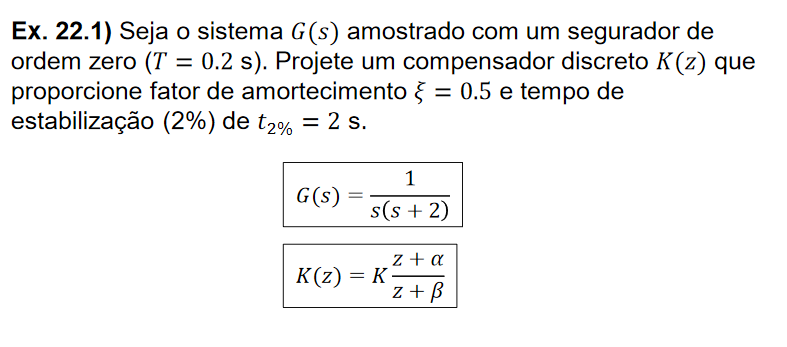

In [2]:
Image('../dados/imagens/22_exe_1.png')

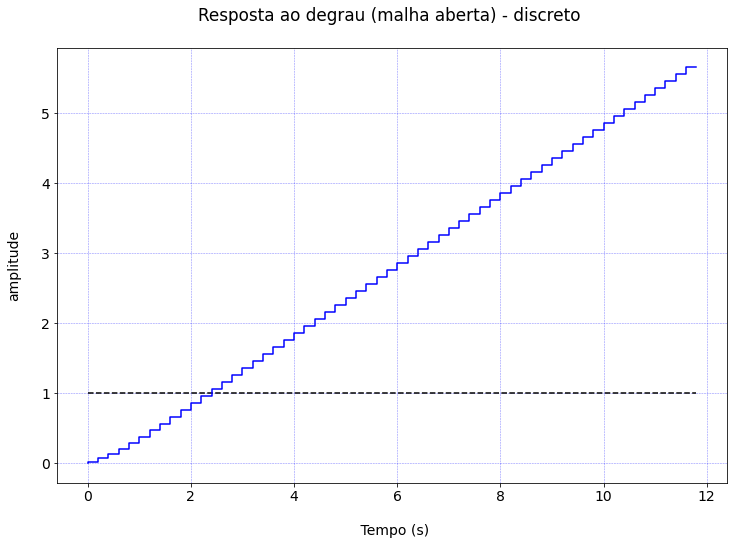

In [82]:

# tempo amostragem (s)
T = 0.2
temp = np.arange(0, 12, T)

s = ctl.tf('s')
Gs = 1/(s*(s+2))

# segurador ordem zero
Gz = ctl.matlab.c2d(Gs, T, method='zoh')

T, yout = ctl.step_response(Gz, temp)

plotaResposta(T, yout, 'Resposta ao degrau (malha aberta) - discreto', 'amplitude', 'blue',
              entrada=True, u=np.ones(len(T)), step=True)


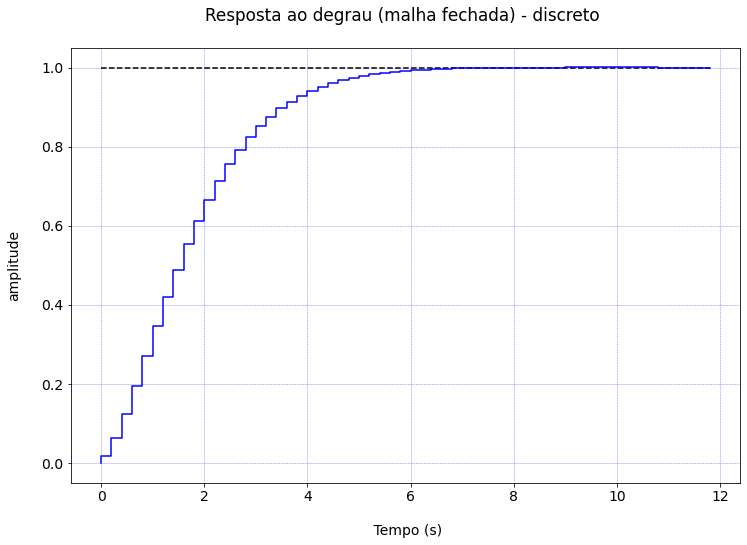

In [83]:

Hz = Gz/(1+Gz)

T, yout = ctl.step_response(Hz, T=temp)

plotaResposta(T, yout, 'Resposta ao degrau (malha fechada) - discreto', 'amplitude', 'blue',
              entrada=True, u=np.ones(len(T)), step=True)


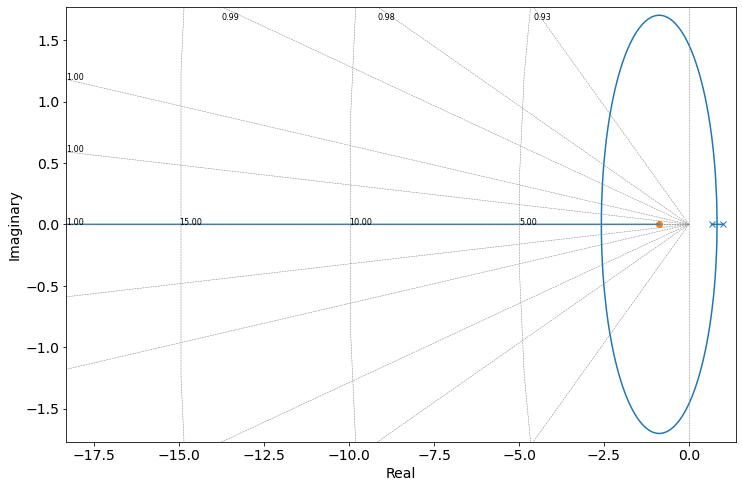

In [84]:
lixo = ctl.rlocus(Gz, Plot=True, grid=True)

In [85]:

rlist, klist = ctl.rlocus(Gz, Plot=False)

# temos 2 polos
df = DataFrame(rlist, columns=['p1', 'p2'])

df.head()


,p1,p2
0,0.670320+0.000000j,1.000000+0.000000j
1,0.690456+0.000000j,0.975884+0.000000j
2,0.714688+0.000000j,0.947671+0.000000j
3,0.746841+0.000000j,0.911537+0.000000j
4,0.827199+0.000000j,0.827199+0.000000j


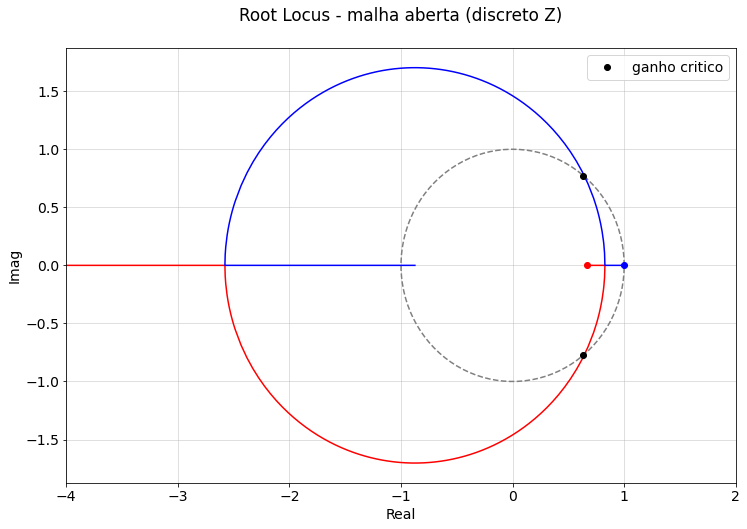

In [99]:

circX, circY = circulo_unit()
plt.plot(circX, circY, color='gray', linestyle='--')

plt.plot(np.real(df['p1'])[0], np.imag(df['p1'])[0], color='red', marker='o')
plt.plot(np.real(df['p1']), np.imag(df['p1']), color='red')

plt.plot(np.real(df['p2'])[0], np.imag(df['p2'])[0], color='blue', marker='o')
plt.plot(np.real(df['p2']), np.imag(df['p2']), color='blue')
plt.xlim([-4,2])

# local Ganho Crítico Kcr
plt.plot(.63, .77,  'o', color='black', label='ganho critico')
plt.plot(.63, -.77, 'o', color='black')

plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Root Locus - malha aberta (discreto Z)\n')
plt.legend()
plt.grid(alpha=.5);
